In [ ]:
import cv2
from matplotlib import pyplot as plt
import os
import yaml

path = "/home/anna/Datasets/annotated/green_net"


In [ ]:
def draw_yolo_boxes(image_path, label_path, class_names, filter_class=-1, palette=[tuple(int(c * 255) for c in color) for color in plt.cm.tab20.colors]):
    """ Draw bounding boxes in yolo format on image"""
    image = cv2.imread(image_path)
    image_height, image_width = image.shape[:2]

    # Open and parse YOLO label file
    with open(label_path, "r") as f:
        for line in f:
            class_id, center_x, center_y, width, height = map(float, line.split())
            if filter_class != -1 and class_id != filter_class:
                continue

            class_id = int(class_id)

            # Convert YOLO format to pixel values
            x1 = int((center_x - (width / 2)) * image_width)
            x2 = int((center_x + (width / 2)) * image_width)
            y1 = int((center_y - (height / 2)) * image_height)
            y2 = int((center_y + (height / 2)) * image_height)
                    
            # Draw bounding box and label
            color = palette[class_id%20] if type(palette) is list else palette

            cv2.rectangle(image, (x1, y1), (x2,y2), color, 5)
            cv2.putText(image, class_names[class_id], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2)

    # Display the image
    plt.imshow(image)
    plt.show()

1050 1245 1527 1715
723 927 1588 1678
1348 1461 1038 1171
400 626 1547 1674


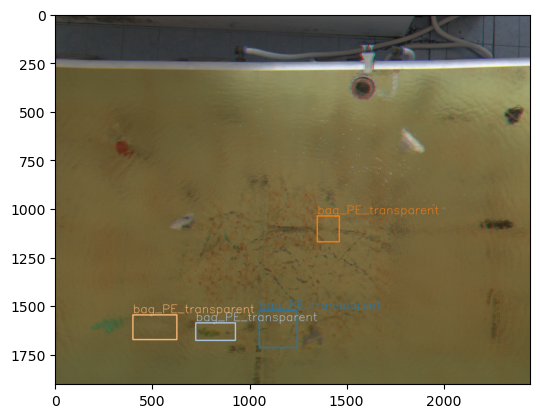

In [ ]:
with open(f"{path}/data_config.yaml", "r") as file:
    config = yaml.safe_load(file)

draw_yolo_boxes(f"{path}/images/train/997287_9:00_0019_5_RGB.png", 
                f"{path}/labels_joined/train/997287_9:00_0019_5_RGB.txt",
                config["names"])